In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import sklearn as sl

import seaborn as sns; sns.set()
import matplotlib as mpl
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
%matplotlib inline

# Tarea 5 y 6: Ecuación de difusión en 3 dimensiones

Uds se preguntarán, ¿por qué vamos a resolver la ecuación de difusión? La respuesta no es muy obvia, pero es interesante: Los procesos de difusión comparten algo muy bonito con los procesos estocásticos. Para ello, vamos a analizar un problema de COVID: el tiempo medio estimado de infección de los viriones.

La transmisión de COVID se da preponderamente debido a la aspersión de aerosoles en el aire. Estas partículas *semi*-esféricas -cuyo orden de magnitud es de $\sim1-10\,\mu m$ de radio- están compuestas principalmente por agua, lípidos orgánicos y viriones (se pueden considerar *quasi*-puntuales ya que son del orden de los $\sim100\,nm$). Cuando una particula del aerosol entra y se adhiere al tracto respiratorio, el virus toma un tiempo en entrar en contacto con las células para infectar el huésped debido al movimiento Browniano. Los viriones, a diferencia de las bacterias, no cuentan con cilios, flagelos u otros mecanismos para desplazarse en los medios, por lo cual, su única esperanza es que por fluctuaciones térmicas puedan llegar a la superficie de la gota de aerosol para replicar su ADN al entrar en contacto con los tejidos susceptibles. Este proceso es en esencia estocástico y se puede modelar mediante la ecuación de Difusión. Esta ecuación tiene dos partes. La idea es que uds resuelvan el problema de la manera más sencilla. La ecuación es la siguiente,
$$
\frac{\partial\Psi}{\partial t}=D\nabla^2\Psi,
$$
donde $D$ es la constante de difusión del medio y $\Psi$ es la concentración de partículas. La taza de difusión depende de la temperatura y la viscosidad del medio y se puede modelar usando la relación de Einstein-Stokes,
$$
D=\frac{k_BT}{6\pi\eta a},
$$
siendo $k_B$ la constante de Boltzmann, $T$ la temperatura en grados Kelvin, $\eta$ la viscosidad del medio y $a$ el radio de los viriones. En esencia, lo que la ecuación de difusión me está diciendo es que la concentración media de viriones depende de la posición y el tiempo. No obstante, para poder calcular el tiempo que tardaría un virión en alcanzar la superficie se puede modelar en la media usando la siguiente ecuación de difusión,
$$
-\nabla^2\tau=\frac{1}{D},
$$
donde $\tau$ es el tiempo medio que dependería de la posición en la que se encuentra inicialmente.

## 1. Escriba la ecuación de difusión para el tiempo $\tau$ en coordenadas esféricas y asuma que $\tau(r,\theta,\phi)\simeq\tau(r)$ ya que por simetría esférica sólo dependerá de la posición radial respecto al centro de la gotica (Usar **LaTex**)

[**Escriba aquí**]

$$
\frac{1}{r^2}\frac{\partial}{\partial r}\left(r^2\frac{\partial\tau}{\partial r}\right)\to\frac{1}{r^2}\frac{\text{d}}{\text{d} r}\left(r^2\frac{\text{d}\tau}{\text{d} r}\right)=-\frac{1}{D}
$$

## 2. Resuelva la ecuación diferencial para el tiempo de forma numérica y grafique

Asuma las siguientes condiciones iniciales:
1. $\tau(r=R)=0$ ya que si el virión está en la superficie el tiempo debe ser naturalmente nulo.
1. $\tau^\prime(r=0)=0$ ya que por simetría la derivada radial debe ser nula en el origen

Suponga las siguientes condiciones:
- $R=5\mu m$ para el radio de la esfera de *quasi* agua (calcula el volumen $V$)
- $\eta_{\text{H}_2\text{O}}\simeq1\times10^{-3}\,Pa\cdot s$ (Pascales por segundo)
- $\frac{\eta}{\eta_{\text{H}_2\text{O}}}\approx10^3\to10^5$
- $a\simeq100\,nm$
- $V=\frac{4}{3}\pi R^3$
- $k_BT\simeq4.05\times10^{-21}J$

In [2]:
# vamos a utilizar micrometros como la unidad para las distancias. Hay que hacer unos ajustes
R = 5
eta_h2o = 1e-9 # en unidades de Kg/(micro m*s)
eta = eta_h2o*1e3
a = 0.1
V = 4/3*np.pi*R**3
kbT = 4.05e-9

D = kbT/(6*np.pi*eta*a)
print(f'D={D} micrometros^2*s')

D=0.0021485917317405866 micrometros^2*s


La solución analítica sin las condiciones de frontera es:
$$
\tau(r)=c_1-\frac{c_2}{r}-\frac{r^2}{6D},
$$
y con las condiciones...
$$
\tau(r)=\frac{R^2-r^2}{6D},
$$


### La ecuación de recurrencia es la siguiente:
$$
r\frac{\text{d}^2\tau}{\text{d} r^2}+2\frac{\text{d} \tau}{\text{d} r}=-\frac{r}{D}\\
r_{n}\frac{\tau_{n+1}-2\tau_{n}+\tau_{n-1}}{\delta r^2}+2\frac{\tau_{n+1}-\tau_{n-1}}{2\delta r}=-\frac{r_{n}}{D}\\
r_{n}\,(\tau_{n+1}-2\tau_{n}+\tau_{n-1})+\delta r\,(\tau_{n+1}-\tau_{n-1})=-r_{n}\,\frac{\delta r^2}{D}\\
(r_{n}+\delta r)\,\tau_{n+1}-2r_n\,\tau_{n}+(r_{n}-\delta r)\,\tau_{n-1}=-r_{n}\,\frac{\delta r^2}{D},\\
$$
con $r_n=n\,\delta r$, que me representan $N+1$ ecuaciones **lineales** para los $N+1$ puntos con lo cual dividimos el intervalo de $[0,R]$. Hay dos términos "locos" que corresponden a las ecuaciones $n=0$ y $n=N$, $\tau_{-1}$ y $\tau_{N+1}$. Tenemos que sustituir las dos ecuaciones para esos $n$ para que no aparezcan esos términos. Esas son las condiciones de frontera, es decir,
$$
\tau_{N}=0\\
\tau^{\prime}(r=0)=0\,\to\,\frac{\tau_{1}-\tau_{-1}}{2\delta x}=0.
$$
Para resolver el último acertijo, asumimos que $r_0=\epsilon>0|\epsilon\to0$ y sustituimos en la ecuación diferencial y obtenemos,

$$
(\epsilon+\delta r)\,\tau_{1}-2\epsilon\,\tau_{0}+(\epsilon-\delta r)\,\tau_{-1}=-\epsilon\,\frac{\delta r^2}{D}\\
(\epsilon+\delta r)\,\tau_{1}-2\epsilon\,\tau_{0}+(\epsilon-\delta r)\,\tau_{1}=-\epsilon\,\frac{\delta r^2}{D}\\
2\epsilon\,\tau_{1}-2\epsilon\,\tau_{0}=-\epsilon\,\frac{\delta r^2}{D}\\
\tau_{1}-\tau_{0}=-\frac{\delta r^2}{2D}
$$
También es válido asumir que $\tau_1-\tau_0=0$ pero se introduce un error menor... No obstante, no hay problema. Al final, el error es pequeño.

Entonces, reescribimos la ecuación diferencial como $\mathbb{M}\tau=\mathbb{b}$

In [3]:
# vamos a escoger N puntos
N = 101
r = np.linspace(0,R,N)
dr = R/(N-1)

In [4]:
M = np.matrix(np.vstack(
    [np.array([-1, 1] + [0]*(N-2))]
    + [np.array([0]*(j-1)+[r[j]-dr, -2*r[j], r[j]+dr] + [0]*(N-j-2)) for j in range(1, N-1)]
    + [np.array([0]*(N-1)+[1])]
))
b = np.matrix(-r*(dr**2/D)).T
# -> mas condiciones de frontera
b[0,0] = -0.5*(dr**2/D)
b[-1,0] = 0

# resolviendo
tau = np.array((np.linalg.inv(M) * b).T).flatten()

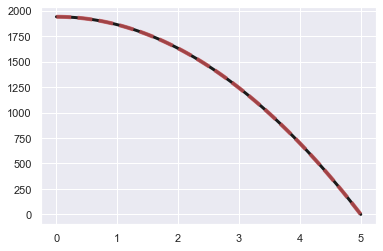

In [5]:
tau_teo = (R**2-r**2)/(6*D)
plt.plot(r,tau, 'k-', lw=3)
plt.plot(r,tau_teo, 'r--', lw=4, alpha=0.8)

## 3. Si los viriones están distribuidos uniformemente, encuentre el tiempo que tardaría un virión en salir de la gota de aerosol.

Tenga presente que debe promediar suponiendo que el virión tiene una distribución uniforme, i.e. $\rho\left(\vec{r}\right)=1/V$, usando la siguiente relación,
$$
\bar{\tau} = \int_{\mathcal{V}}\tau\left(\vec{r}\right)\rho\left(\vec{r}\right)\,\text{d}\vec{r} = \frac{4\pi}{V}\int_{0}^{R}\tau(r)\,r^2\text{d}r.
$$
Realice la integral numéricamente.

In [6]:
tau_promedio = (4*np.pi/V)*sp.integrate.simpson(tau*r**2, r)
print('El tiempo promedio de escape es, en segundos:',tau_promedio)

El tiempo promedio de escape es, en segundos: 775.7018820182277


## 4. Las cadenas de Markov.

Vamos a resolver el problema anterior usando un proceso de Markov. Suponga que ud **divide** la esfera en cubitos de ancho $\delta x=\delta y=\delta z=\Delta=R/N$ con $N$ un número determinado de particiones. Para nuestro experimento, vamos a suponer que ponemos un virión en una posición inicial $\vec{r}_0=(\Delta\,j, 0, 0)$, determinada por un índice $j\in\{0,1,2,\dots,N\}$. Ud va a actualizar la posición del virión en la malla discreta siguiendo las reglas a continuación:
- Determine el número de divisiones $N$ y calcule $\Delta$.
- Ajuste la escala de tiempo $\delta t$ y de tal manera que la probabilidad $\alpha=D\frac{\delta t}{\Delta^2}<\frac{1}{6}$. (Recomiendo $\leq1/12$)
- Haga una corrida de Markov-Monte Carlo actualizando la posición con la probabilidad de transición $\alpha$ hacia los primeros vecinos cercanos y calcule el número de pasos de tiempo para llegar a la superficie, i.e. $|\vec{r}(t_m)|>R-\Delta$
- Repita este experimento para la misma posición un gran número de veces para obtener una estadística (media y desviación estándar).
- Repita todos los pasos para todos los índices $j\in\{0,1,2,\dots,N\}$ y grafique. ¡Compare con los resultados anteriores!

In [7]:
Delta = dr
dt = Delta**2/(12*D)
alpha = D*dt/(Delta**2)
print(f'Delta={Delta:.6f} micrometros')
print(f'dt={dt:.6f} segundos')
print(f'alpha={alpha:.6f}')

Delta=0.050000 micrometros
dt=0.096963 segundos
alpha=0.083333


In [10]:
# sin perdida de generalidad puedo asumir que la posición de un virión es (j*Delta,0,0) para j entre 0 y N
def marcha_aleatoria(j, /, dt, Delta, alpha, R):
    r_virion = np.array([j, 0, 0], dtype=int) # lo puedo simplificar a las coordenadas con respecto a los bloques, despues multiplico por Delta
    n_dt_elapsed = 0

    # vamos a actualizar con un "vector" -> izquierda, derecha, arriba, abajo, adelante, atrás, o se queda quieto
    dr_virion = [
        (-1, 0, 0), # izquierda
        (1, 0, 0), # derecha
        (0, 0, 1), # arriba
        (0, 0, -1), # abajo
        (0, 1, 0), # adelante
        (0, -1, 0), # atrás
        (0, 0, 0), # quieto
    ]
    # rnd = np.random.default_rng(seed=[0,1,2,3])
    rnd = np.random.default_rng()
    while np.dot(r_virion, r_virion)*Delta**2 < (R-Delta/2)**2:
        dr_random = rnd.choice(dr_virion, p=[alpha, alpha, alpha, alpha, alpha, alpha, 1-6*alpha])
        r_virion += dr_random
        n_dt_elapsed += 1
    return n_dt_elapsed*dt

In [11]:
%%timeit

j = 0 # un ejemplo...
t_ejemplo = marcha_aleatoria(j, dt=dt, Delta=Delta, alpha=alpha, R=R)
print(f'Pasaron {t_ejemplo} segundos para que el virion llegara a la superficie de la esferita')

Pasaron 2416.2144239137065 segundos para que el virion llegara a la superficie de la esferita
Pasaron 2485.7367057848137 segundos para que el virion llegara a la superficie de la esferita
Pasaron 1714.107250930876 segundos para que el virion llegara a la superficie de la esferita
Pasaron 3353.650157707106 segundos para que el virion llegara a la superficie de la esferita
Pasaron 2925.656640023607 segundos para que el virion llegara a la superficie de la esferita
Pasaron 1510.485504864871 segundos para que el virion llegara a la superficie de la esferita
Pasaron 528.931726090504 segundos para que el virion llegara a la superficie de la esferita
Pasaron 854.6295570598904 segundos para que el virion llegara a la superficie de la esferita
The slowest run took 7.57 times longer than the fastest. This could mean that an intermediate result is being cached.
667 ms ± 375 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## 5. Diseñe un experimento para calcular el numeral (3) usando Markov-Monte Carlo

In [12]:
def repeticiones_de_la_marcha(j, rep, /, dt, Delta, alpha, R):
    res = [
        marcha_aleatoria(j, dt=dt, Delta=Delta, alpha=alpha, R=R)
        for _ in range(rep)
    ]
    print(f'terminó j: {j}')
    return np.mean(res), np.std(res)

resultados = np.array([
    repeticiones_de_la_marcha(j, 100, dt=dt, Delta=Delta, alpha=alpha, R=R)
    for j in range(0,N+1,1)
])

terminó j: 0
terminó j: 1
terminó j: 2
terminó j: 3
terminó j: 4
terminó j: 5
terminó j: 6
terminó j: 7
terminó j: 8
terminó j: 9
terminó j: 10
terminó j: 11
terminó j: 12
terminó j: 13
terminó j: 14
terminó j: 15
terminó j: 16
terminó j: 17
terminó j: 18
terminó j: 19
terminó j: 20
terminó j: 21
terminó j: 22
terminó j: 23
terminó j: 24
terminó j: 25
terminó j: 26
terminó j: 27
terminó j: 28
terminó j: 29
terminó j: 30
terminó j: 31
terminó j: 32
terminó j: 33
terminó j: 34
terminó j: 35
terminó j: 36
terminó j: 37
terminó j: 38
terminó j: 39
terminó j: 40
terminó j: 41
terminó j: 42
terminó j: 43
terminó j: 44
terminó j: 45
terminó j: 46
terminó j: 47
terminó j: 48
terminó j: 49
terminó j: 50
terminó j: 51
terminó j: 52
terminó j: 53
terminó j: 54
terminó j: 55
terminó j: 56
terminó j: 57
terminó j: 58
terminó j: 59
terminó j: 60
terminó j: 61
terminó j: 62
terminó j: 63
terminó j: 64
terminó j: 65
terminó j: 66
terminó j: 67
terminó j: 68
terminó j: 69
terminó j: 70
terminó j: 71
te

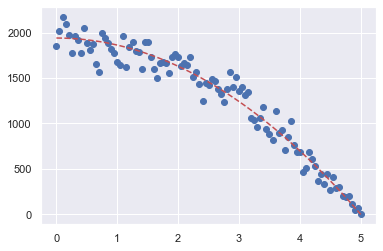

In [23]:
plt.plot(r, resultados[:,0][:-1], 'bo')
plt.plot(r, tau, 'r--')